<h3>Food Gardens for the Doomsday<h3>
<h5>Toby Mast<h5>

Importing Csv and Trimming it down a bit. Datatset is of good gardens self-reported by members of the Grow Pittsburgh non-profit. Removing url, latitude, longitude, state, country won't be using them. Adding inlist of what we consider valid Pittsburgh zipcodes.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
##import geoplot
%matplotlib inline
import matplotlib.pyplot as plot


url="https://data.wprdc.org/dataset/0d8c9708-3f01-48c4-adff-04d29825c9a2/resource/dbdfcb3e-8fa5-4468-9b05-f69562798f7a/download/growpghgardens201712.csv"
foodGardens=pd.read_csv(url,
                        index_col="grower_id")
#removing columns we don't need
foodGardens=foodGardens.drop(columns=["url", "latitude","longitude","state","country"])
zip_codes = [15106, 15120, 15201, 15204, 15205, 15206, 15207, 15208, 15210, 15211, 15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220, 15221, 15222, 15224, 15226, 15227, 15232, 15233, 15234, 15235, 15236, 15238]


Removing the zip codes not in pittburgh and doing a bit more trimming, and removing the ones without a zipcode. Wouldn't trust the address without a zipcode, and definitly wouldn't trust the cordinates.

In [2]:
print(foodGardens.shape)
# Droopping ones outside of pittsburgh
foodGardens=foodGardens.loc[foodGardens["city"]=="Pittsburgh"]
#dropping na and to be safe zipcodesone outside of pitsburgh and changing them to ints
foodGardens=foodGardens.dropna(subset=["zip_code"])
foodGardens["zip_code"]=pd.to_numeric(foodGardens["zip_code"],downcast="integer")
foodGardens = foodGardens[foodGardens["zip_code"].isin(zip_codes)]
print(foodGardens.shape)
foodGardens.head(10)

(80, 5)
(58, 5)


,urban_grower,category,street_address,city,zip_code
grower_id,,,,,
586,Everybody's Garden,sustainability-fund-site|other,301 West Elizabeth Street,Pittsburgh,15207
587,EvGard Extension,other,NaN,Pittsburgh,15201
588,Glen Hazel Communiuty Garden,other,Johnston Avenue at Roselle Drive,Pittsburgh,15207
589,Grow Pittsburgh,grow-pittsburgh-site,6587 Hamilton Avenue #2W,Pittsburgh,15206
590,Lawrenceville Organic Community Garden,other,"Allegheny Cemetery, 4734 Butler Street",Pittsburgh,15201
591,Masjid al Mu'min Madinah Garden,sustainability-fund-site|other,159 Winslow Street,Pittsburgh,15206
592,South Oakland Community Orchard,other,3213 Parkview Avenue,Pittsburgh,15213
593,Thelma Lovette YMCA Garden,other,2114 Centre Avenue,Pittsburgh,15219
594,Wiggins Garden,other,Near 3026 Wiggins Street,Pittsburgh,15219


Collecting the categories and assigning values to them

In [3]:
print(foodGardens["category"].unique()) #finding what we have to work with

['sustainability-fund-site|other' 'other' 'grow-pittsburgh-site'
 'community-farm' 'community-farm|school-garden' 'school-garden'
 'commercial-urban-farm|grow-pittsburgh-site' 'commercial-urban-farm'
 'sustainability-fund-site' 'community-garden'
 'sustainability-fund-site|school-garden' 'allegheny-grows-site']


In [4]:
scores={'sustainability-fund-site|other':1,
       'other' :0,
       'grow-pittsburgh-site':0,
       'community-farm' :1,
       'community-farm|school-garden' :1,
       'school-garden':0,
       'commercial-urban-farm|grow-pittsburgh-site':3,
       'commercial-urban-farm':3,
       'allegheny-grows-site' :0,
       'sustainability-fund-site' :1,
       'community-garden':0,
       'sustainability-fund-site|school-garden':1}

Defualt is 1
Sustainable is +1
farm is +1
commercial is +2
For the value of each in order to account for how beneficial each one would be in the doomsdat scenario

In [5]:
# Create a dictionary to store the counts
center_counter = {}
# loop over the data
scoresA = []
for value in foodGardens["category"]:
    scoresA.append(scores[value]+1)
        
foodGardens["scores"] = scoresA 
for i in range(len(foodGardens)) :
    z=foodGardens.iloc[i, 4]
    s=foodGardens.iloc[i, 5]
    #print(row[2])
    # check to see if the center is already in the dictionary
    if z not in center_counter:
        # create a new entry
        center_counter[z] = s
    else:
        center_counter[z] = center_counter[z] + s

# Display the dictionary 
print(center_counter)
print(len(center_counter))

{15207: 5, 15201: 6, 15206: 18, 15213: 9, 15219: 8, 15221: 6, 15224: 7, 15214: 2, 15212: 3, 15208: 11, 15217: 2, 15204: 1, 15238: 2, 15210: 3, 15218: 1, 15220: 3}
16


In [6]:
##Checking to see why 15206 in the East Libery area has so many
bestzip=foodGardens[foodGardens["zip_code"]==15206]
bestzip.head(18)

,urban_grower,category,street_address,city,zip_code,scores
grower_id,,,,,,
589,Grow Pittsburgh,grow-pittsburgh-site,6587 Hamilton Avenue #2W,Pittsburgh,15206,1
591,Masjid al Mu'min Madinah Garden,sustainability-fund-site|other,159 Winslow Street,Pittsburgh,15206,2
676,Sheridan Avenue Orchard,community-farm,310 Sheridan Avenue,Pittsburgh,15206,2
680,Borland Green Cooperative,school-garden,5806 Black Street,Pittsburgh,15206,1
686,Dilworth Traditional Academy,school-garden,6200 Stanton Avenue,Pittsburgh,15206,1
695,Pittsburgh Montessori PreK 5,school-garden,201 S Graham Street,Pittsburgh,15206,1
705,The Neighborhood Academy,school-garden,709 N Aiken Avenue,Pittsburgh,15206,1
706,Urban League Charter School,school-garden,327 N Negley Avenue,Pittsburgh,15206,1
713,East Field Cooperative Garden,sustainability-fund-site,5543 Black Street,Pittsburgh,15206,2


Seeing how data would is distbuted in a bar graph

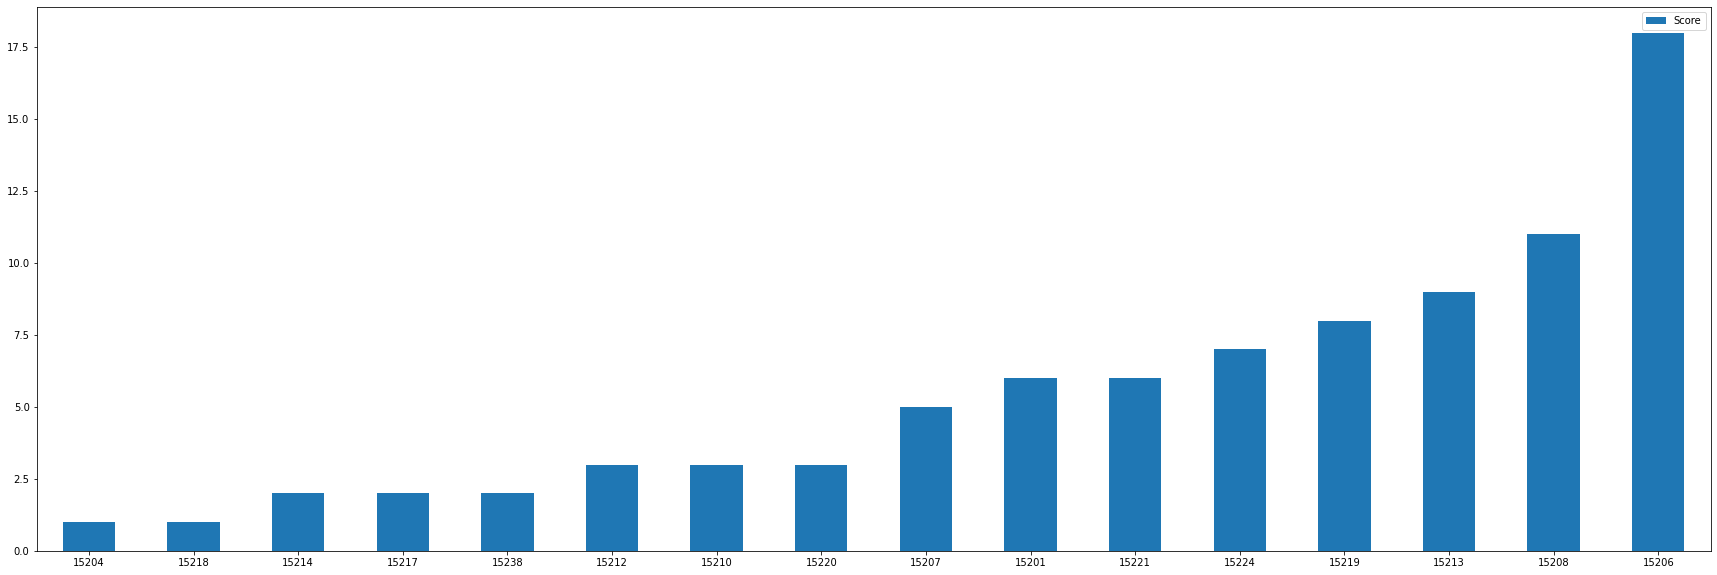

In [14]:
df=pd.DataFrame.from_dict(center_counter, orient='index',columns=(["Score"]))
df=df.sort_values(by=["Score"])
ax=df.plot.bar(y="Score",rot=0, figsize=(30,10))

Let's add in the population dataset from https://www.city-data.com/zipmaps/Pittsburgh-Pennsylvania.html, for the population by zipcode

       Score  Garden Score  Garden Score 10000
15204      1             1            1.152605
15218      1             1            0.716640
15214      2             2            1.378645
15217      2             2            0.701557
15238      2             2            1.479290
15212      3             3            1.123259
15210      3             3            1.107052
15220      3             3            1.661130
15207      5             5            3.917574
15201      6             6            4.619649
15221      6             6            1.907123
15224      7             7            6.395614
15219      8             8            4.926412
15213      9             9            3.202277
15208     11            11           10.525309
15206     18            18            6.128911


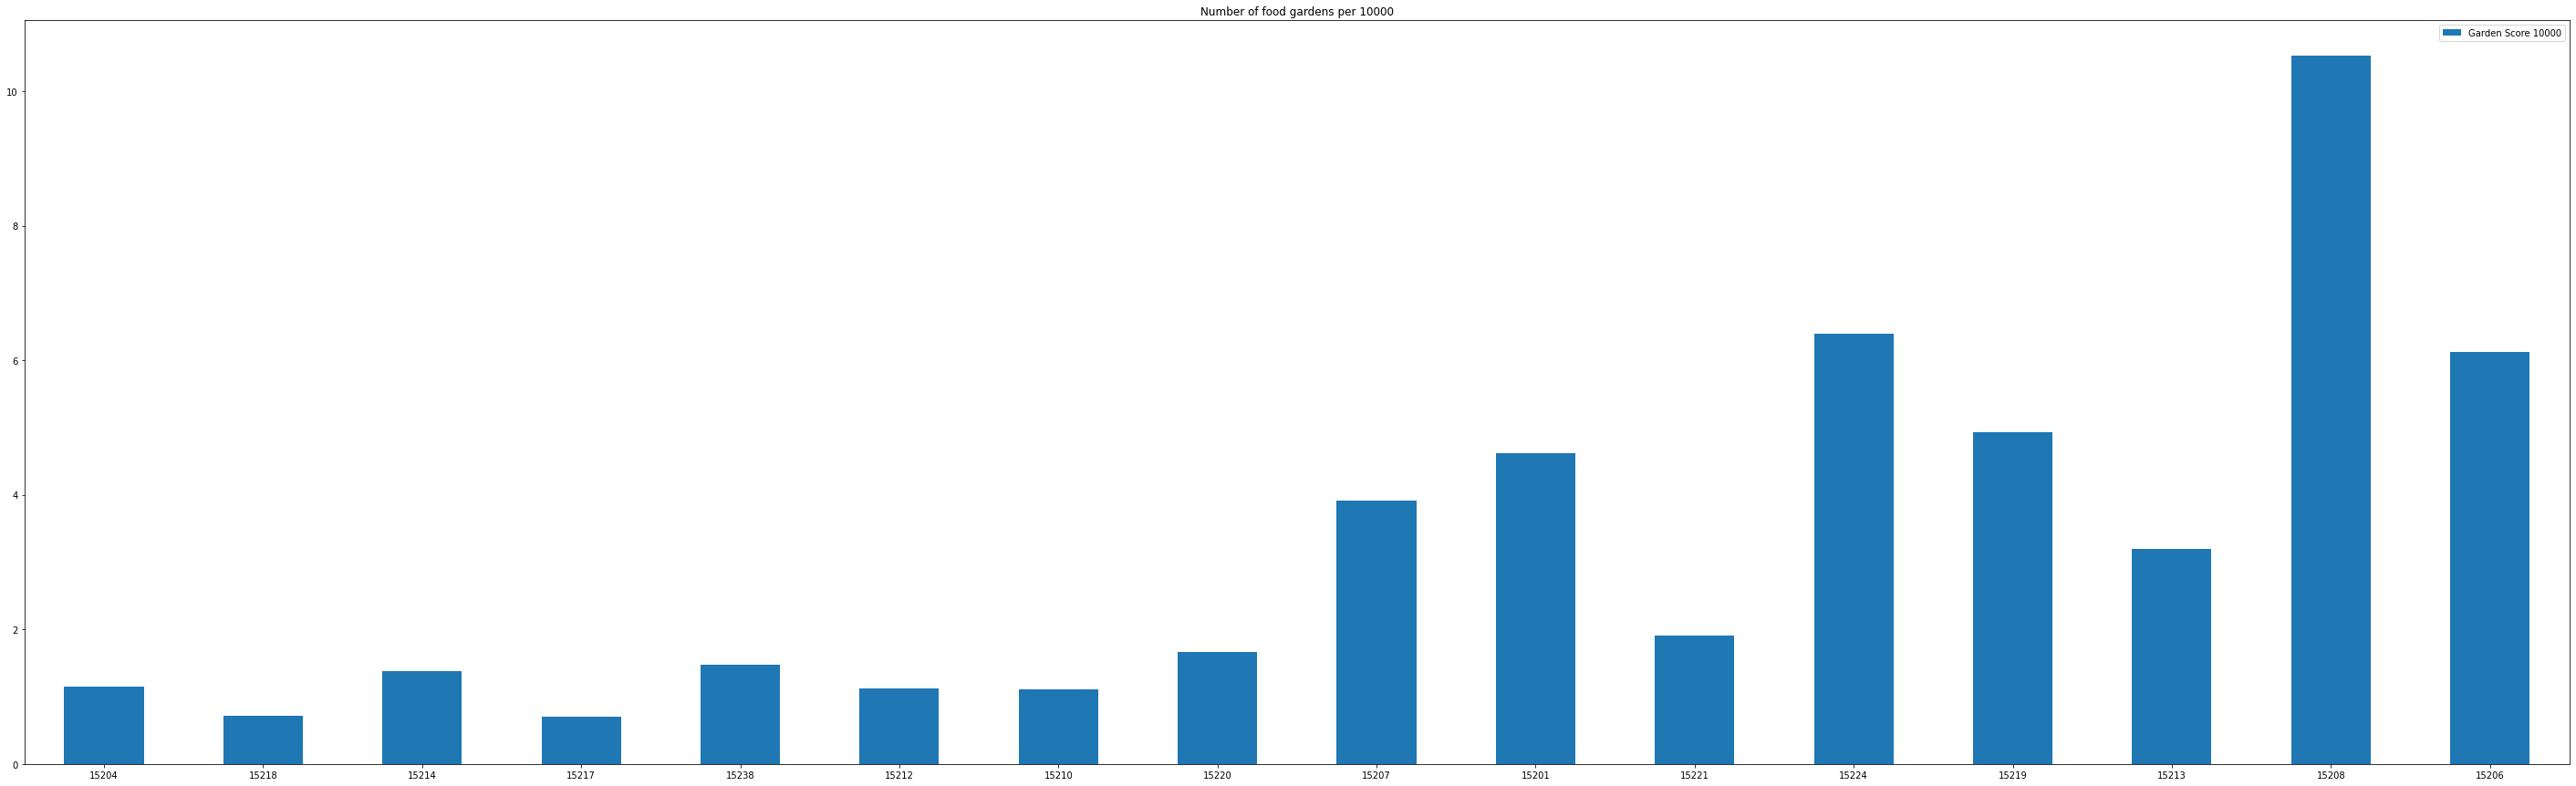

In [17]:
pop={
15106:19575,
15120:18757,
15201:12988,
15204:8676,
15205:22736,
15206:29369,
15207:12763,
15208:10451,
15210:27099,
15211:11141,
15212:26708,
15213:28105,
15214:14507,
15215:12566,
15216:23217,
15217:28508,
15218:13954,
15219:16239,
15220:18060,
15221:31461,
15222:4256,
15224:10945,
15226:13813,
15227:29198,
15232:11858,
15233:4469,
15234:13676,
15235:34625,
15236:29916,
15238:13520,
}
df["Garden Score"]=pd.DataFrame.from_dict(center_counter,orient='index',columns=["Garden score"])
df=df.sort_values(by='Garden Score')

##dfTH.plot.bar(x='Garden Score',figsize=(50,15),rot=0, title='Garden Score by Pittsburgh Zip Codes')
popS=[]
for ind in df.index:
    storeT=df['Garden Score'][ind]
    popT=pop[ind]
    popS.append(storeT/popT*10000)
df["Garden Score 10000"]=popS
print(df)
df.plot.bar(figsize=(50,15),rot=0,y="Garden Score 10000", title='Number of food gardens per 10000')

<h5>Answer<h5>
While 15206 has the best score it is clearly a result of population, more than density. This would explain why it had so many school gardens which are only worth one. 15206 best corresponds to the east liberty neighborhood. The best per capitia is by a long shot is 15208 which best corresponds to the homewood and point breeze.